In [2]:
import pandas as pd #for reading the dataset
import numpy as np #for plotting
import seaborn as sns #for plotting
import matplotlib.pyplot as plt #for plotting
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Jegadit/Customer-Churn-Prediction-Analysis-Using-Ensemble-Techniques/main/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Exploratory Data Analysis

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.duplicated().sum()

0

In [7]:
df = df.drop_duplicates(subset= None, keep= 'first', inplace= False, ignore_index= False)
df.duplicated().sum()

0

In [8]:
df.shape

(7043, 21)

In [9]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# FEATURE ENGINEERING

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### ENCODING & DROPPING

In [12]:
from sklearn.preprocessing import LabelEncoder

cols = df.columns.to_list()

label_encoder = LabelEncoder()
test = df['Churn']
df = df.drop(['Churn'], axis = 1)


for i in range(len(cols)-3):
    df[cols[i]] = label_encoder.fit_transform(df[cols[i]])

df['Churn'] = label_encoder.fit_transform(test)

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853,1,0,1,1,24,1,2,0,2,...,2,2,2,2,1,1,3,84.80,1990.50,0
7039,1525,0,0,1,1,72,1,2,1,0,...,2,0,2,2,1,1,1,103.20,7362.90,0
7040,3367,0,0,1,1,11,0,1,0,2,...,0,0,0,0,0,1,2,29.60,346.45,0
7041,5934,1,1,1,0,4,1,2,1,0,...,0,0,0,0,0,1,3,74.40,306.60,1


In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
droplist = ['customerID','MultipleLines', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

df = df.drop(columns=droplist)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,Contract,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,2,0,29.85,29.85,0
1,1,0,0,0,34,1,0,2,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,2,2,0,53.85,108.15,1
3,1,0,0,0,45,0,0,2,0,1,42.30,1840.75,0
4,0,0,0,0,2,1,1,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,0,2,0,1,84.80,1990.50,0
7039,0,0,1,1,72,1,1,0,2,1,103.20,7362.90,0
7040,0,0,1,1,11,0,0,2,0,0,29.60,346.45,0
7041,1,1,1,0,4,1,1,0,0,0,74.40,306.60,1


In [15]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'Contract', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# DATA VISUALIZATION

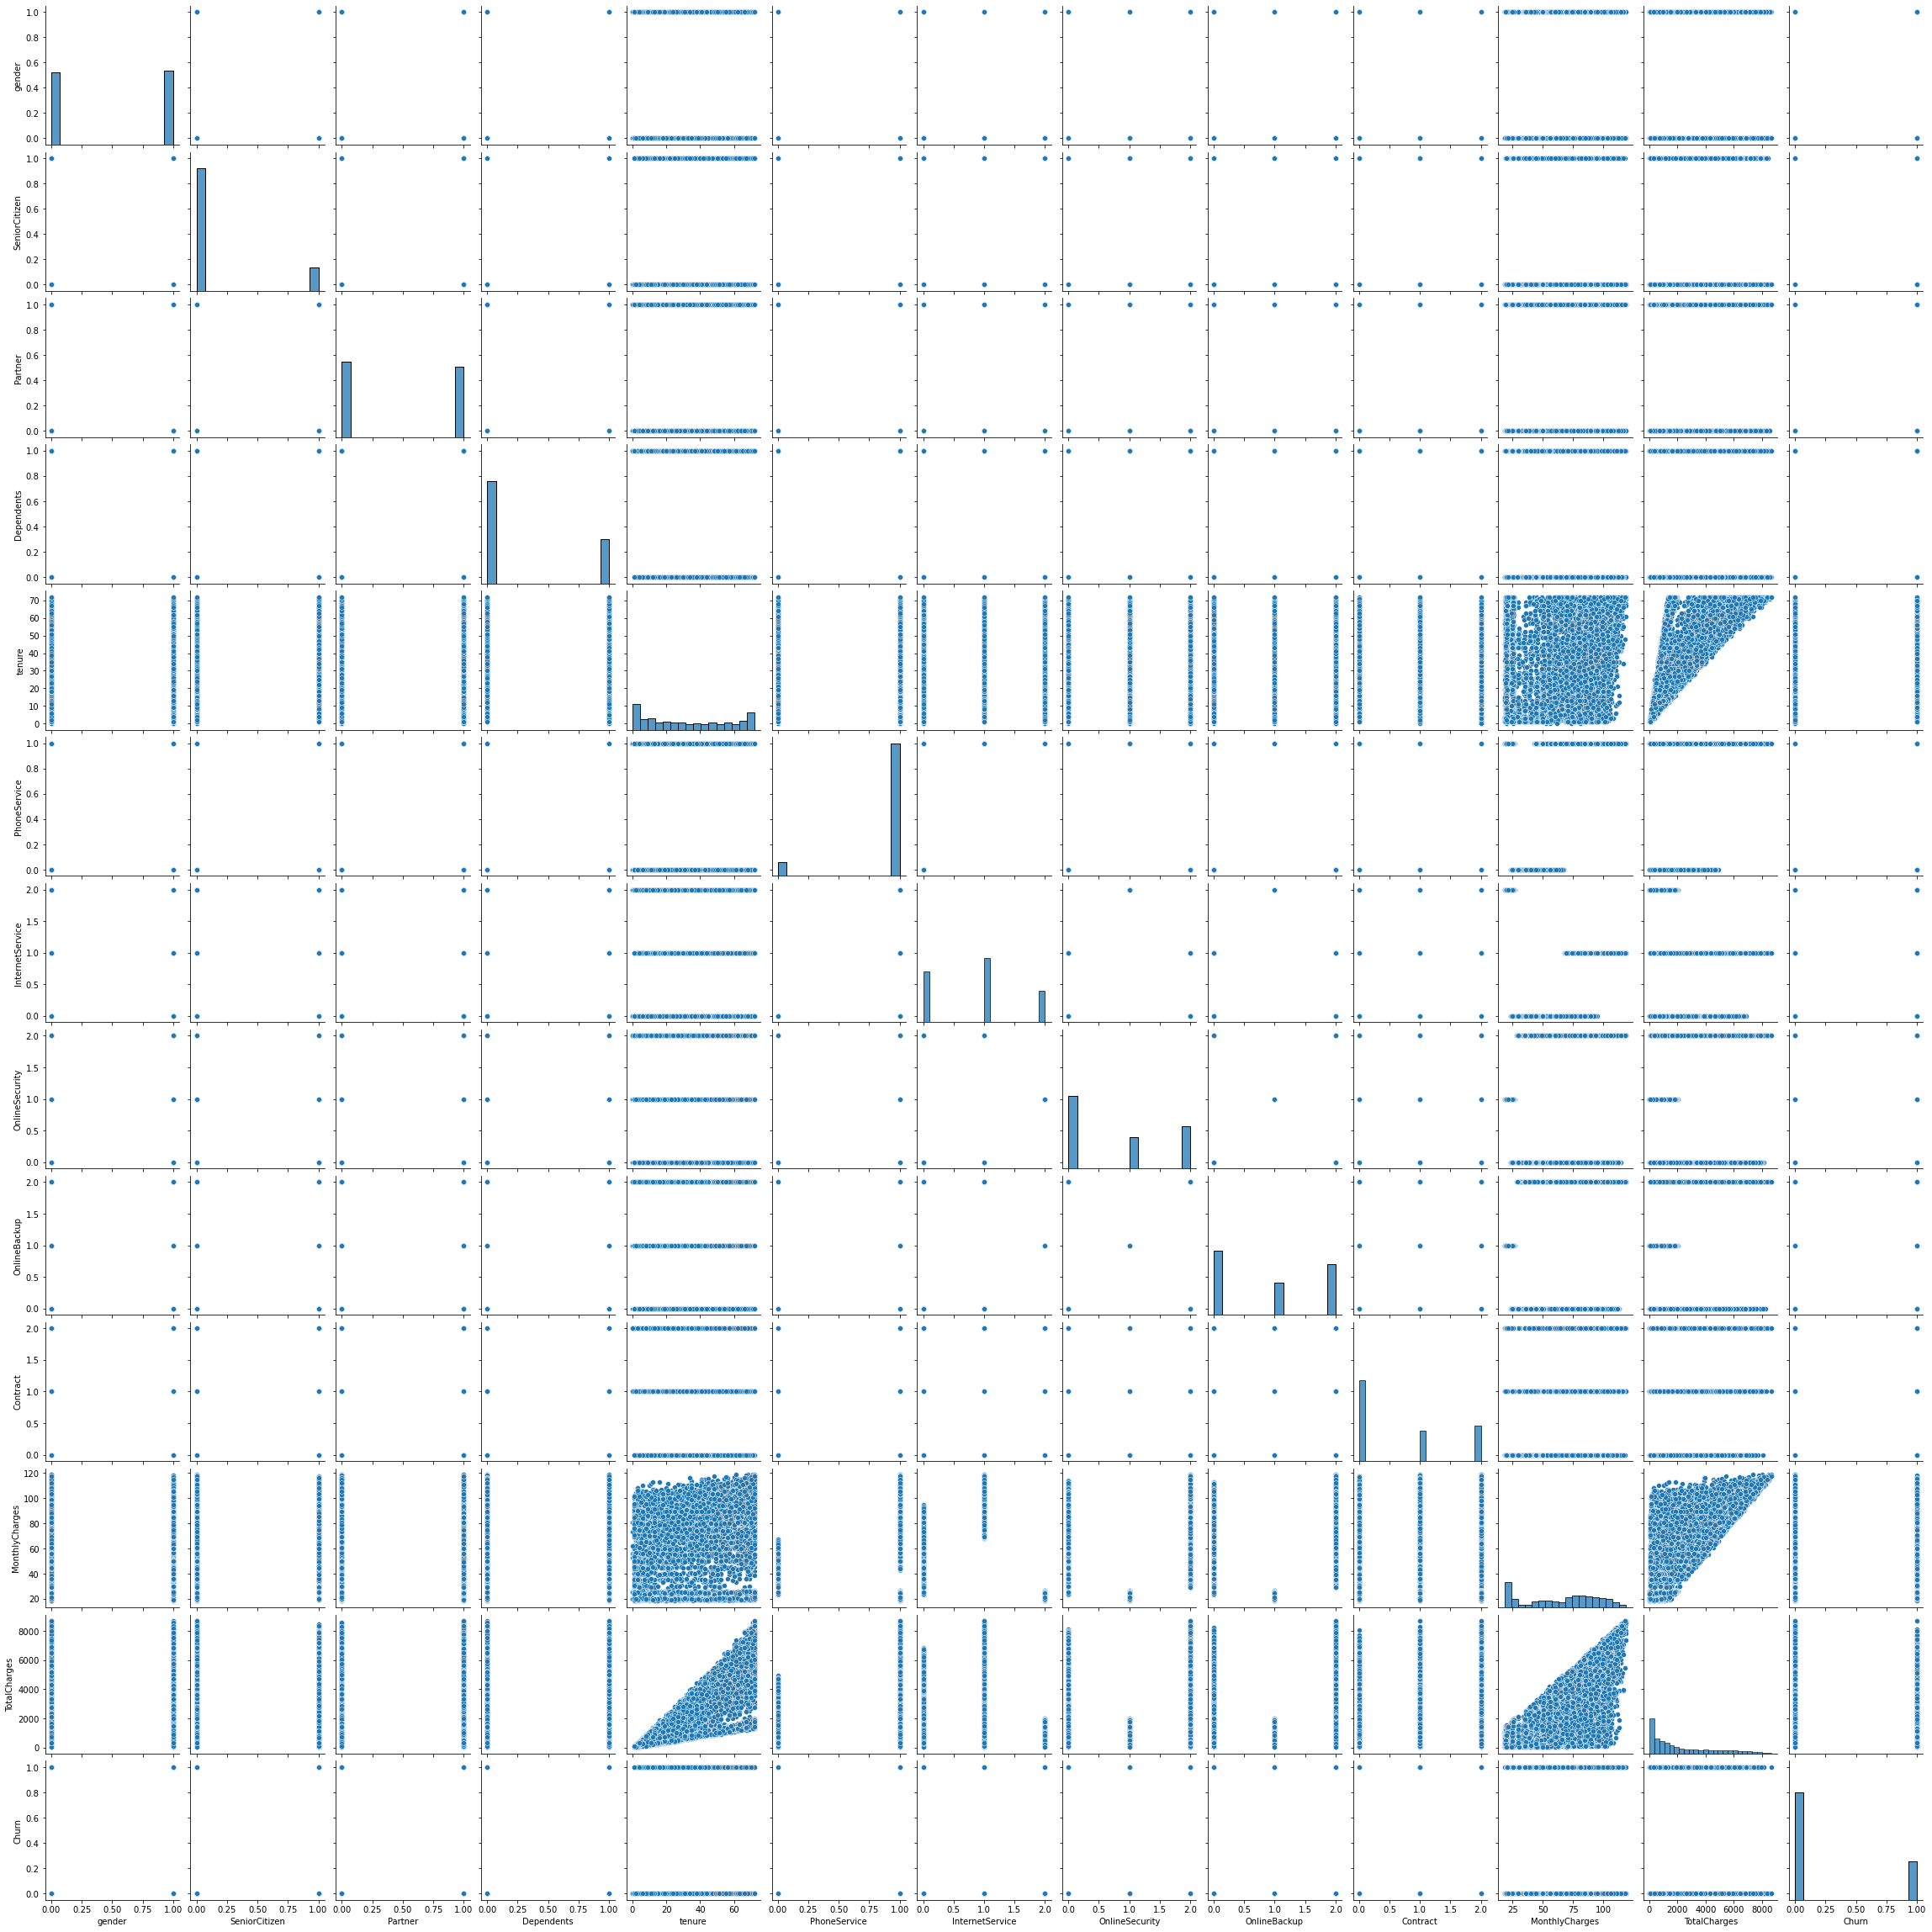

In [16]:
sns.pairplot(df)

In [17]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

<AxesSubplot:>

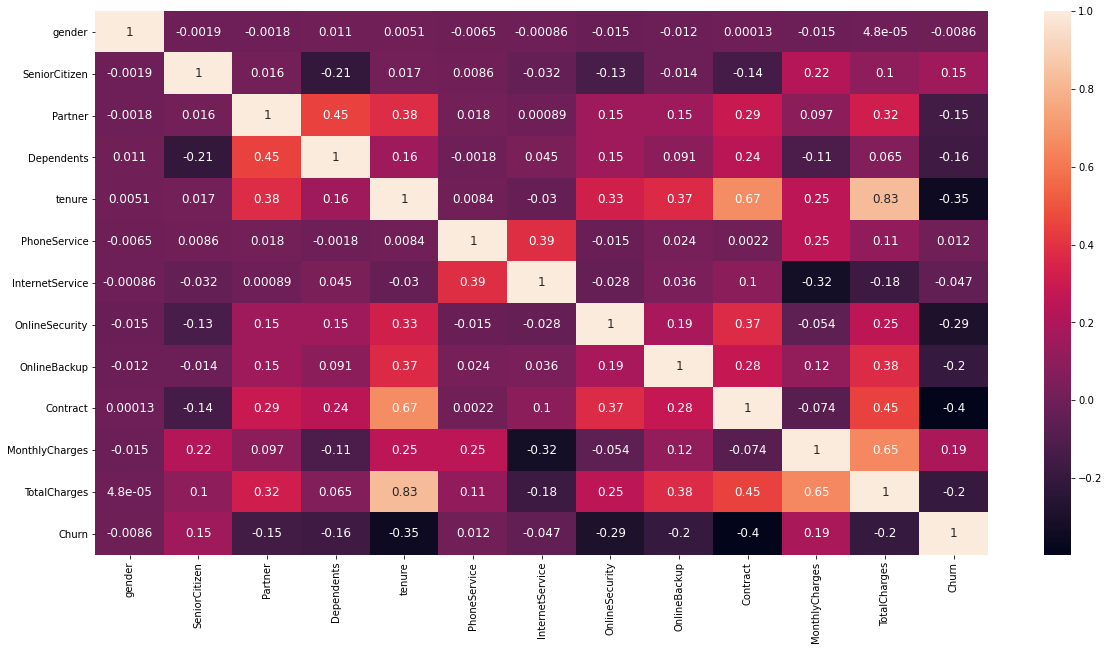

In [18]:
corr=df.corr()

plt.figure(figsize = (20,10))

sns.heatmap(corr, annot=True, annot_kws={'size': 12})

<AxesSubplot:xlabel='tenure'>

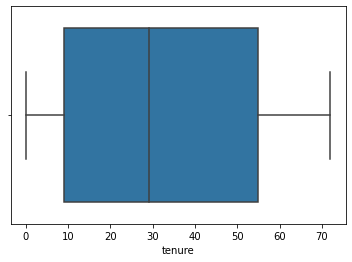

In [19]:
sns.boxplot(x='tenure',data=df)

<AxesSubplot:xlabel='MonthlyCharges'>

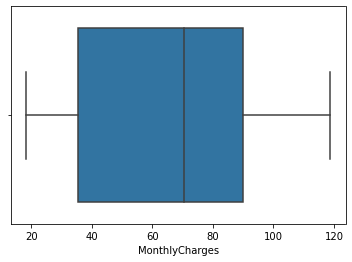

In [20]:
sns.boxplot(x='MonthlyCharges',data=df)

<AxesSubplot:xlabel='TotalCharges'>

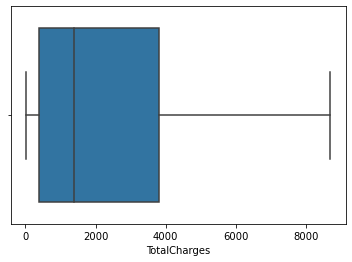

In [21]:
sns.boxplot(x='TotalCharges',data=df)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

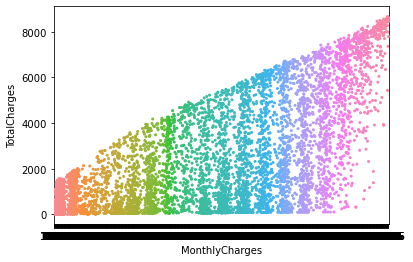

In [22]:
sns.stripplot(x="MonthlyCharges", y="TotalCharges", data=df, size=3, dodge=True)

<AxesSubplot:xlabel='tenure', ylabel='PhoneService'>

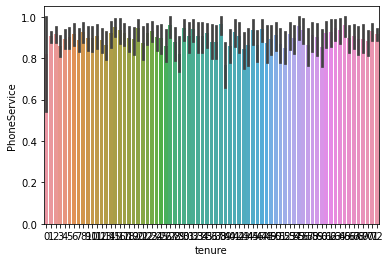

In [23]:
sns.barplot(x='tenure', y='PhoneService', data=df)

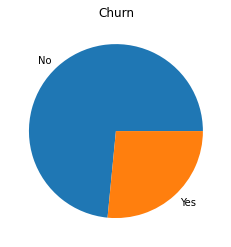

In [24]:
y = df.groupby('Churn').Churn.count()
mylabels = ["No", "Yes"]
plt.title("Churn")
plt.pie(y, labels = mylabels)
plt.show() 

<AxesSubplot:xlabel='Churn', ylabel='SeniorCitizen'>

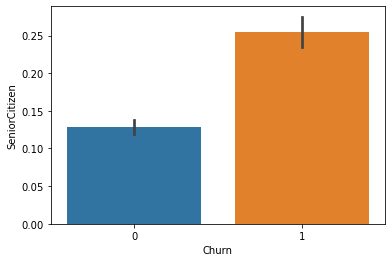

In [25]:
sns.barplot(data= df, x= "Churn", y= "SeniorCitizen")

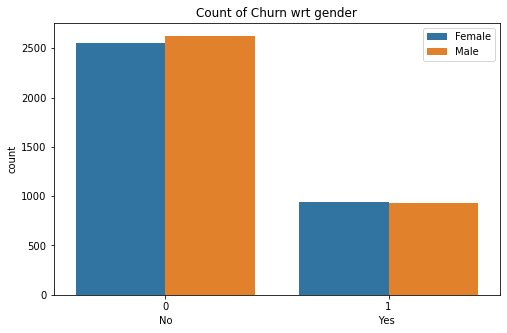

In [26]:
plt.figure(figsize=(8,5))
sns.countplot(x='Churn', hue='gender',data=df)
plt.xlabel('No                                                                  Yes')
plt.title("Count of Churn wrt gender")
plt.legend(['Female','Male'])


In [27]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,Contract,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,2,0,29.85,29.85,0
1,1,0,0,0,34,1,0,2,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,0,2,2,0,53.85,108.15,1
3,1,0,0,0,45,0,0,2,0,1,42.30,1840.75,0
4,0,0,0,0,2,1,1,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,0,2,0,1,84.80,1990.50,0
7039,0,0,1,1,72,1,1,0,2,1,103.20,7362.90,0
7040,0,0,1,1,11,0,0,2,0,0,29.60,346.45,0
7041,1,1,1,0,4,1,1,0,0,0,74.40,306.60,1


### UnderSampling

<AxesSubplot:title={'center':'count (target)'}>

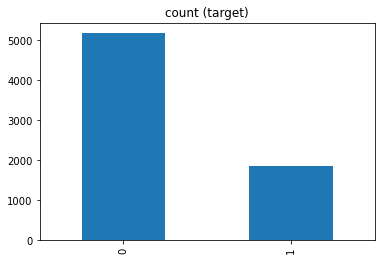

In [28]:
df['Churn'].value_counts().plot(kind='bar', title='count (target)')

In [29]:
# class count
class_count_no, class_count_yes = df['Churn'].value_counts()

# seperate class
class_yes = df[df['Churn'] == 1]
class_no = df[df['Churn'] == 0]

print('class_yes: ', class_yes.shape)
print('class_no: ', class_no.shape)
class_count_yes

class_yes:  (1869, 13)
class_no:  (5174, 13)


1869

<AxesSubplot:title={'center':'count (target)'}>

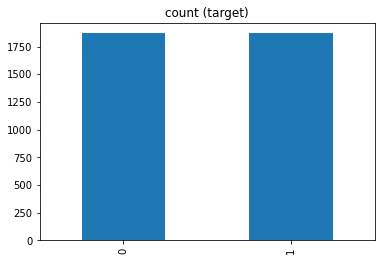

In [30]:
class_no_under = class_no.sample(class_count_yes)
data_sampled = pd.concat([class_no_under,class_yes], ignore_index = True, axis = 0)
data_sampled = data_sampled.sample(frac = 1)
data_sampled['Churn'].value_counts().plot(kind='bar', title='count (target)')

In [31]:
data_sampled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,Contract,MonthlyCharges,TotalCharges,Churn
2068,1,0,1,0,40,1,1,0,2,0,101.30,4113.10,1
728,0,0,1,1,62,1,0,0,0,0,70.45,4300.45,0
549,1,0,1,1,7,1,0,2,0,0,69.70,516.15,0
3375,1,0,1,0,22,1,0,2,0,0,54.20,1152.70,1
2858,0,1,0,0,1,1,0,2,0,0,55.80,55.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,0,0,1,1,70,1,2,1,1,2,19.20,1401.40,0
2829,0,0,0,0,1,1,0,0,0,0,45.80,45.80,1
556,1,0,1,0,61,1,2,1,1,2,25.45,1538.60,0
1101,0,1,1,0,59,1,1,2,2,1,94.05,5483.90,0


# Base line Model

### Dummy Classification
- DummyClassifier makes predictions that ignore the input features.
- This classifier serves as a simple baseline to compare against other more complex classifiers.

In [32]:
x_dummy = data_sampled['MonthlyCharges']
y_dummy = data_sampled['Churn']

In [33]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(x_dummy, y_dummy)

DummyClassifier(strategy='stratified')

In [34]:
dummy_clf.predict(x_dummy)

array([0, 1, 0, ..., 1, 1, 0])

In [35]:
dummy_clf.score(x_dummy, y_dummy)

0.507223113964687

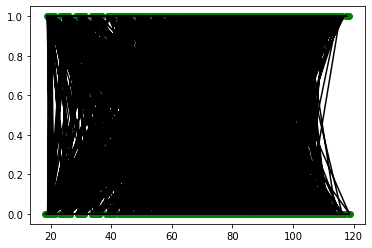

In [36]:
y_pred = dummy_clf.predict(x_dummy)
plt.scatter(x_dummy, y_dummy, color ='g')
plt.plot(x_dummy, y_pred, color ='k')

plt.show()

### Logistic Regression

In [37]:
from sklearn.model_selection import train_test_split

x_dummy = np.array(x_dummy).reshape(-1, 1)
y_dummy = np.array(y_dummy).reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x_dummy, y_dummy, test_size=0.25, random_state=27)

In [38]:
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

c:\Users\Jegadit\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [39]:
predictions = logisticRegr.predict(x_test)

In [40]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.5989304812834224


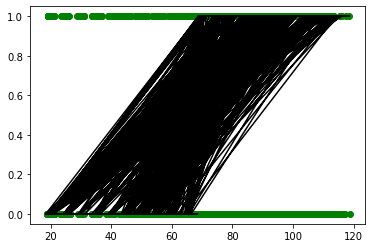

In [41]:
y_pred = logisticRegr.predict(x_test)
plt.scatter(x_train, y_train, color ='g')
plt.plot(x_test, y_pred, color ='k')

plt.show()

# Decision Tree

In [42]:
y_for_desctrees = data_sampled['Churn']
x_for_desctrees = data_sampled.drop(['Churn','MonthlyCharges','TotalCharges'], axis = 1)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(x_for_desctrees, y_for_desctrees, test_size=0.3, shuffle = True)

dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

[Text(0.6616211768192838, 0.9772727272727273, 'X[9] <= 0.5\nentropy = 1.0\nsamples = 2616\nvalue = [1276, 1340]'),
 Text(0.3925978954895373, 0.9318181818181818, 'X[7] <= 0.5\nentropy = 0.9\nsamples = 1729\nvalue = [547, 1182]'),
 Text(0.18525746161534534, 0.8863636363636364, 'X[4] <= 8.5\nentropy = 0.809\nsamples = 1283\nvalue = [319, 964]'),
 Text(0.07859816264035387, 0.8409090909090909, 'X[6] <= 0.5\nentropy = 0.591\nsamples = 603\nvalue = [86, 517]'),
 Text(0.049761823749574684, 0.7954545454545454, 'X[4] <= 5.5\nentropy = 0.787\nsamples = 204\nvalue = [48, 156]'),
 Text(0.03215379380741749, 0.75, 'X[8] <= 1.0\nentropy = 0.706\nsamples = 177\nvalue = [34, 143]'),
 Text(0.0187138482477033, 0.7045454545454546, 'X[5] <= 0.5\nentropy = 0.639\nsamples = 148\nvalue = [24, 124]'),
 Text(0.006805035726437564, 0.6590909090909091, 'X[4] <= 2.5\nentropy = 0.397\nsamples = 51\nvalue = [4, 47]'),
 Text(0.0027220142905750254, 0.6136363636363636, 'X[3] <= 0.5\nentropy = 0.191\nsamples = 34\nvalue =

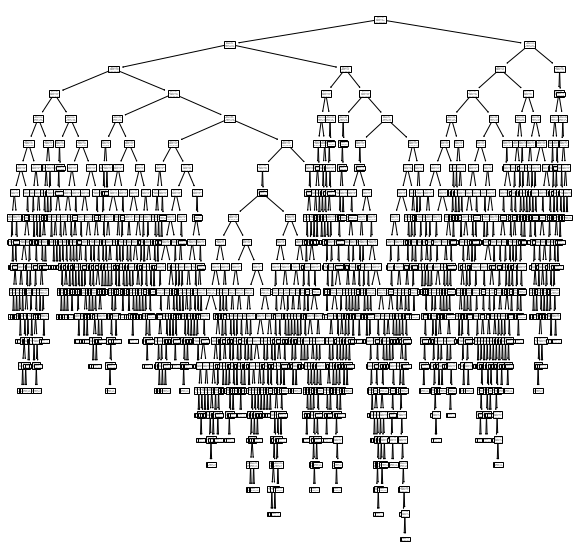

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((10,10)))
plot_tree(dtree)

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

predicitions = dtree.predict(X_test)
acc = accuracy_score(y_test, predicitions)
acc

0.7049910873440285

In [46]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, predicitions)
print(cr)

              precision    recall  f1-score   support

           0       0.75      0.67      0.70       593
           1       0.67      0.75      0.71       529

    accuracy                           0.70      1122
   macro avg       0.71      0.71      0.70      1122
weighted avg       0.71      0.70      0.70      1122

